In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('house_train.csv', usecols=['FireplaceQu', 'GarageQual', 'SalePrice'])

In [6]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [8]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='FireplaceQu'>

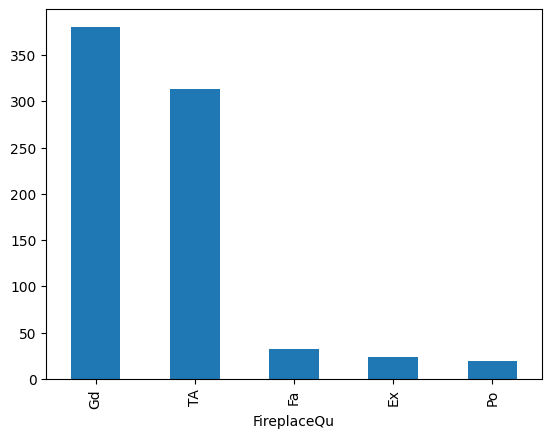

In [9]:
df['FireplaceQu'].value_counts().plot(kind='bar')

<Axes: xlabel='GarageQual'>

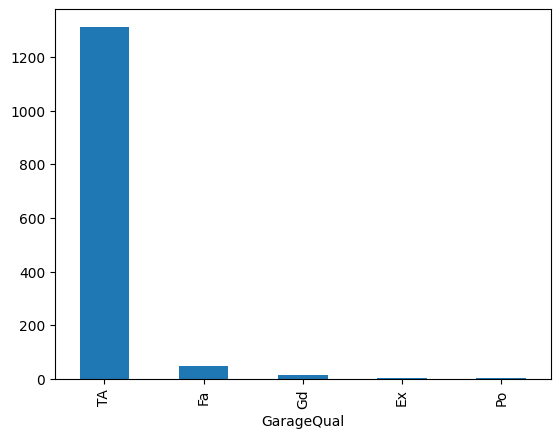

In [10]:
df['GarageQual'].value_counts().plot(kind='bar')

# filling with the most frequent

In [11]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
ctf1 = ColumnTransformer([
    ('tnf1', SimpleImputer(strategy='most_frequent'), ['FireplaceQu']),
    ('tnf2', SimpleImputer(strategy='most_frequent'), ['GarageQual'])
])

In [14]:
ctf1.fit(x_train)

ColumnTransformer(transformers=[('tnf1',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['FireplaceQu']),
                                ('tnf2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['GarageQual'])])

In [15]:
new_xtrain = ctf1.transform(x_train)
new_xtest = ctf1.transform(x_test)

In [16]:
new_xtrain = pd.DataFrame(columns=x_train.columns, data =ctf1.transform(x_train))
new_xtest = pd.DataFrame(columns=x_test.columns, data =ctf1.transform(x_test))

In [17]:
ctf2 = ColumnTransformer([
    ('tnf1', OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']]), ['FireplaceQu']),
    ('tnf2', OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']]), ['GarageQual'])
])

In [18]:
transform_train = pd.DataFrame(columns=x_train.columns, data=ctf2.fit_transform(new_xtrain))
transform_test = pd.DataFrame(columns=x_test.columns, data=ctf2.transform(new_xtest))

In [20]:
clf = DecisionTreeRegressor()
clf.fit(transform_train, y_train)
pred = clf.predict(transform_test)

print(r2_score(y_test, pred))
print(np.mean(cross_val_score(estimator=clf, X=transform_train, y=y_train, scoring='r2')))

0.13786384805952512
0.095767054818599


In [21]:
clf = LinearRegression()
clf.fit(transform_train, y_train)
pred = clf.predict(transform_test)

print(r2_score(y_test, pred))
print(np.mean(cross_val_score(estimator=clf, X=transform_train, y=y_train, scoring='r2')))

0.02324331405824842
0.008579933552528262


In [34]:
clf = LogisticRegression()
clf.fit(transform_train, y_train)
pred = clf.predict(transform_test)

print(r2_score(y_test, pred))
print(np.mean(cross_val_score(estimator=clf, X=transform_train, y=y_train, scoring='r2')))

C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.21979399870607674


C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.21507253330608603


C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# making a new col missing 

In [23]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
ctf1 = ColumnTransformer([
    ('tnf1', SimpleImputer(strategy='constant', fill_value='Missing'), ['FireplaceQu']),
    ('tnf2', SimpleImputer(strategy='constant', fill_value='Missing'), ['GarageQual'])
])

In [26]:
new_xtrain = pd.DataFrame(columns=x_train.columns, data =ctf1.fit_transform(x_train))
new_xtest = pd.DataFrame(columns=x_test.columns, data =ctf1.transform(x_test))

In [27]:
ctf2 = ColumnTransformer([
    ('tnf1', OrdinalEncoder(categories=[['Missing','Po', 'Fa', 'TA', 'Gd', 'Ex']]), ['FireplaceQu']),
    ('tnf2', OrdinalEncoder(categories=[['Missing','Po', 'Fa', 'TA', 'Gd', 'Ex']]), ['GarageQual'])
])

In [28]:
transform_train = pd.DataFrame(columns=x_train.columns, data=ctf2.fit_transform(new_xtrain))
transform_test = pd.DataFrame(columns=x_test.columns, data=ctf2.transform(new_xtest))

In [29]:
clf = DecisionTreeRegressor()
clf.fit(transform_train, y_train)
pred = clf.predict(transform_test)

print(r2_score(y_test, pred))
print(np.mean(cross_val_score(estimator=clf, X=transform_train, y=y_train, scoring='r2')))

0.33820487078916284
0.29451074185825965


In [30]:
clf = LinearRegression()
clf.fit(transform_train, y_train)
pred = clf.predict(transform_test)

print(r2_score(y_test, pred))
print(np.mean(cross_val_score(estimator=clf, X=transform_train, y=y_train, scoring='r2')))

0.29763740829890706
0.29438720859504264


In [31]:
clf = LogisticRegression()
clf.fit(transform_train, y_train)
pred = clf.predict(transform_test)

print(r2_score(y_test, pred))
print(np.mean(cross_val_score(estimator=clf, X=transform_train, y=y_train, scoring='r2')))

C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.21979399870607674


C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.21507253330608603


C:\Users\UTSAV\anaconda3\envs\mlc\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## logistic regression works on categorical data